<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

In [11]:
df['job_title_short'].value_counts().head(5)

job_title_short
Data Analyst         196075
Data Engineer        186241
Data Scientist       172286
Business Analyst      49063
Software Engineer     44929
Name: count, dtype: int64

In [12]:
df['job_country'].value_counts(sort=True).head(5)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

<Axes: ylabel='job_title_short'>

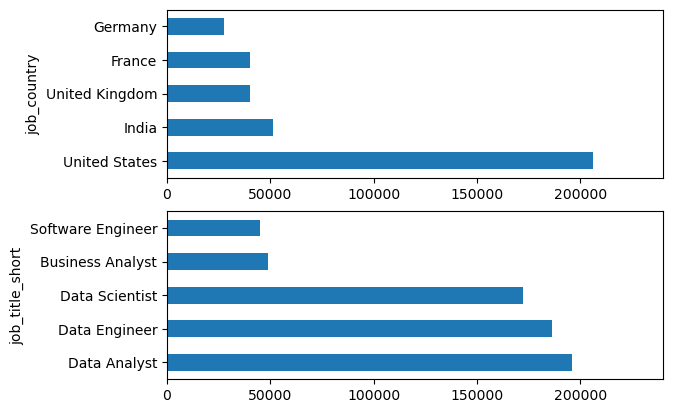

In [24]:
fig, ax = plt.subplots(2, 1)

df['job_country'].value_counts(sort=True).head(5)   .plot(kind='barh', ax=ax[0], xlim=(0, 24_0000))

df['job_title_short'].value_counts().head(5)        .plot(kind='barh', ax=ax[1], xlim=(0, 240_000))

---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

In [66]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
df[['job_title_short', 'job_schedule_type']]
df_filtered = df[df['job_schedule_type'].isin(schedules)][['job_title_short', 'job_schedule_type']]

In [50]:
df_filtered

,job_title_short,job_schedule_type
0,Senior Data Engineer,Full-time
1,Data Analyst,Full-time
2,Data Engineer,Full-time
3,Data Engineer,Full-time
4,Data Engineer,Full-time
...,...,...
785702,Business Analyst,Full-time
785703,Data Analyst,Full-time
785704,Business Analyst,Full-time
785705,Data Analyst,Full-time


<Axes: xlabel='job_title_short', ylabel='Contractor'>

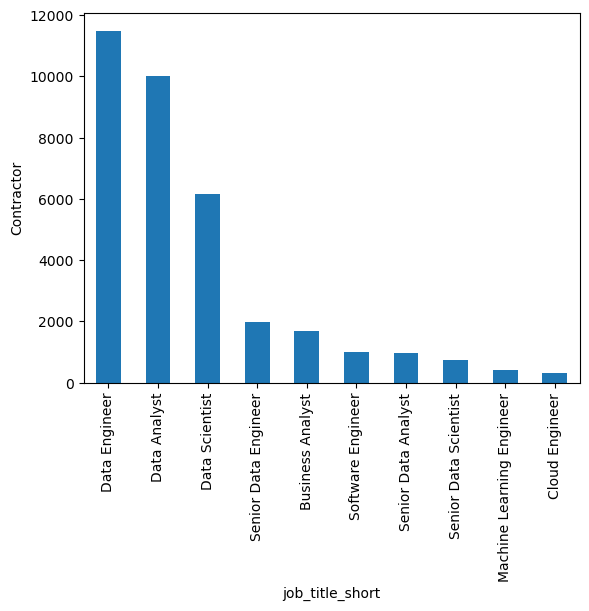

In [78]:
df_filtered[df_filtered['job_schedule_type'] == schedules[2]].groupby('job_title_short').size().sort_values(ascending=False).plot(kind='bar', ylabel=schedules[2])

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

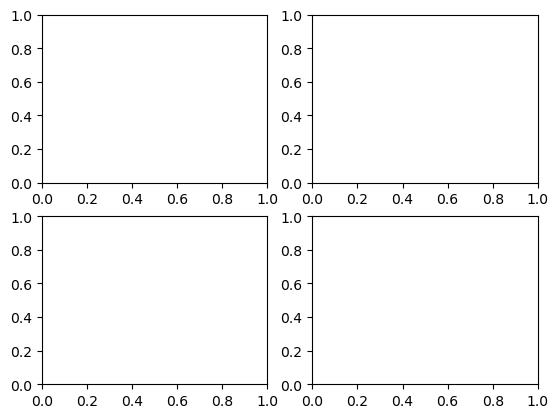

In [103]:
fig, ax = plt.subplots(int(len(schedules)/2), int(len(schedules)/2))

for i, sched in enumerate(schedules):
    df_filtered[df_filtered['job_schedule_type'] == schedules[i]].groupby('job_title_short').size().sort_values(ascending=False).plot(kind='bar', ylabel=sched, ax=ax[i])
    print(f"Index: {i}, Schedule: {sched}")

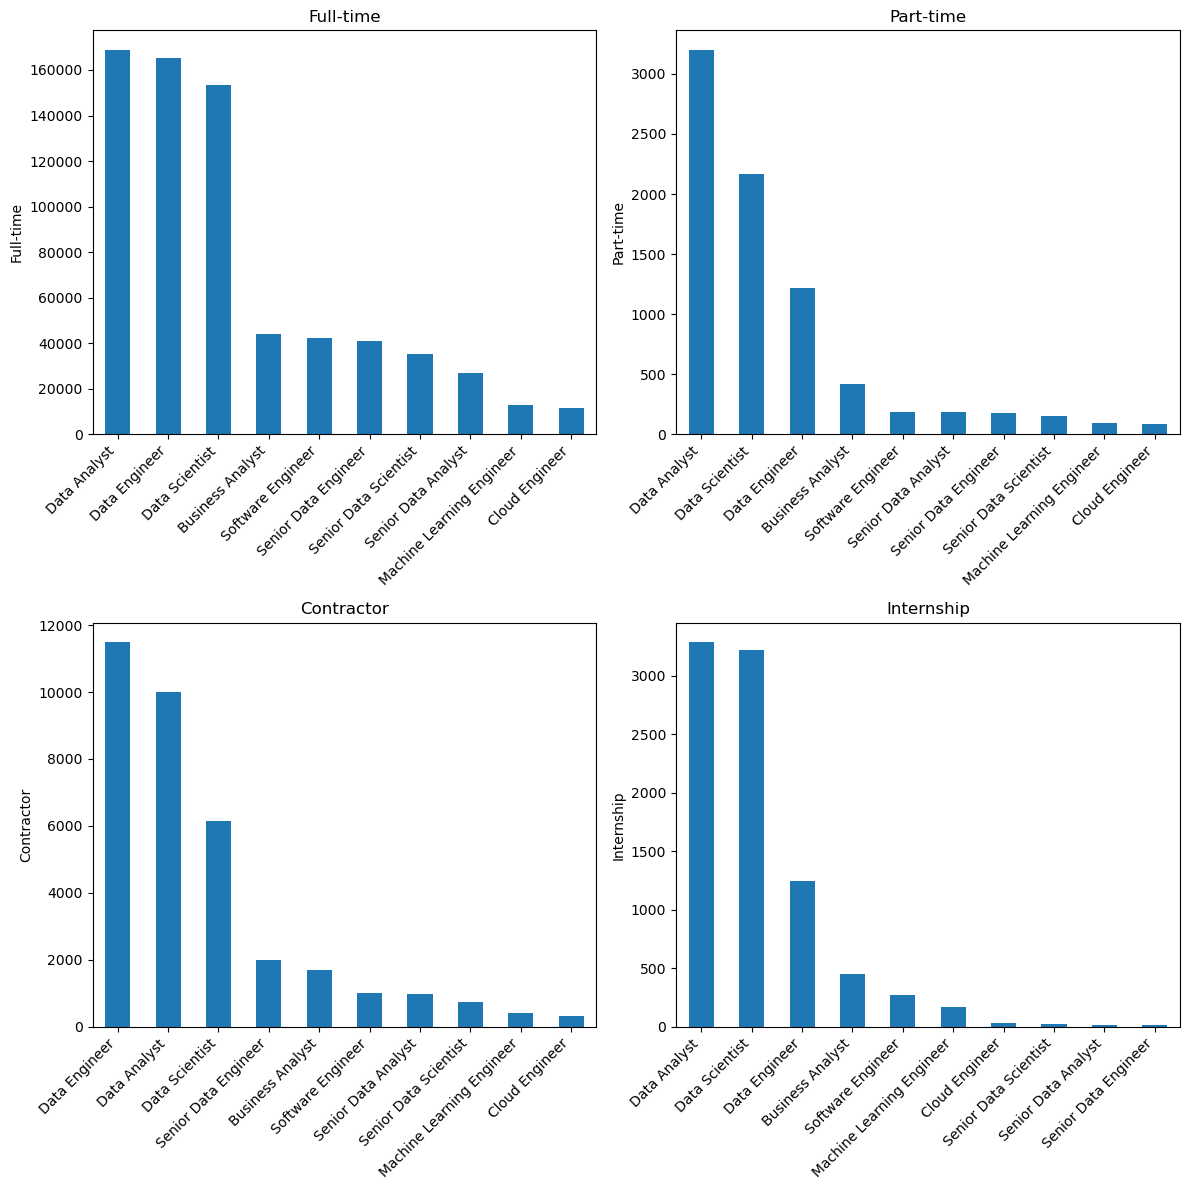

In [112]:
fig, ax = plt.subplots(int(len(schedules)/2), int(len(schedules)/2), figsize=(12,12))
ax = ax.flatten()

for i, sched in enumerate(schedules):
    df_filtered[df_filtered['job_schedule_type'] == sched].groupby('job_title_short').size().sort_values(ascending=False).plot(kind='bar', ylabel=sched, ax=ax[i], title=sched, xlabel='')
    ax[i].tick_params(axis='x', labelrotation=45, )
    
    for label in ax[i].get_xticklabels():
        label.set_ha('right')
        label.set_x('')



plt.tight_layout()
plt.show()

In [90]:
print(len(schedules))

4


In [60]:
df_filtered.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, Business Analyst to Software Engineer
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [ ]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
filtered_df = df[df['job_schedule_type'].isin(schedules)][['job_title_short', 'job_schedule_type']]

---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

In [ ]:
# Code Needed
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

---